**Задача**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.


**Инструкция по выполнению проекта**

1. Шаг 1. Загрузите данные
2. Шаг 2. Проведите исследовательский анализ данных (EDA)
3. Шаг 3. Постройте модель прогнозирования оттока клиентов
4. Шаг 4. Сделайте кластеризацию клиентов
5. Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

In [1]:
#Загрузим все необходимые библиотеки
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# для полного отображения содержимого столбцов
pd.set_option('display.max_colwidth', -1)
# импорт sklearn и ее методов/алгоритмов
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly import graph_objects as go

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

### Шаг 1. Загрузка данных

In [3]:
#загрузим нащ датасет
df = pd.read_csv('/datasets/gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.41,12.00,8,2.28,2.35,0
3996,0,1,0,0,1,1,1,29,68.88,1.00,1,1.28,0.29,1
3997,1,1,1,1,1,12,0,28,78.25,11.00,2,2.79,2.83,0
3998,0,1,1,1,1,6,0,32,61.91,5.00,3,1.63,1.60,0


### Шаг 2. Проведём исследовательский анализ данных (EDA)

In [4]:
#Посмортрим на количемтво дубликатов
df.duplicated().sum()

0

In [5]:
#Приведем название столбцов к нижнему регистру для удобства
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**Вывод:**

В датасете 4000 строк и 14 колонок с информацией о клиентах фитнес центров.

Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

Пропусков и дубликов нет, можно приступать к следующему шагу. 

#### Посмотрим на датасет

In [6]:
#Посмотрим на датасет методом describe()
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Вывод:

Выбросов нет, данные равномерные, одинаковое количество мужчин и женщин, абонимент покупают в основном на 6 месяцев. В столбце age видно что минимальный возраст 18 лет, а максимальный 41 год, а вот std 3,26 это скорей всего люди блиского возраста. В contract_period мин 1 месяц мах 12, а вот std 4,5 оможно сказать что длительность абонемента меньше 12 месяцев, avg_additional_charges_total выручка от дополнительных услуг не велика, month_to_end_contract срок окончания у всех примерно одинаков, обонементы взяты на определенный период. Среднее посещение в неделю не так высоко, посещают не чаше 2-3 раз в неделю.

#### Посмотрим на средние значения признаков в двух группах, кто ушёл и кто остался.

In [7]:
# Посмотрим на тех, кто ушел в отток и тех, кто остался
churn_group = df.groupby('churn').mean()
churn_group_transpose = churn_group.transpose()
churn_group_transpose

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


**Вывод:**

Среди тех кто остался больше всего тех, кто рядом проживает, сотрудник компании-партнера
привели друзья, тот кто около полугода в клубе, посещает групповые занятия, кто старше 29 лет, у кого абонемент на полгода, у кого до конца абонемента около полгода, кто давно в клубе, посещает клуб не меньше двух раз в неделю. Так же больше остаются те клиенты, которые больше тратит на дополнительные услуги.

#### Построим столбчатые гистограммы

In [8]:
#список количественных переменных
list_1 = ['age', 'lifetime', 'contract_period', 'avg_additional_charges_total', 
          'month_to_end_contract', 'avg_class_frequency_total', 
          'avg_class_frequency_current_month']
#список категориальных пременных
list_2 = ['gender', 'near_location', 'partner', 'promo_friends','phone', 'group_visits']
df_1 = df
df_1 = df_1.replace({'churn':{0:'остался', 1:'ушел'}})

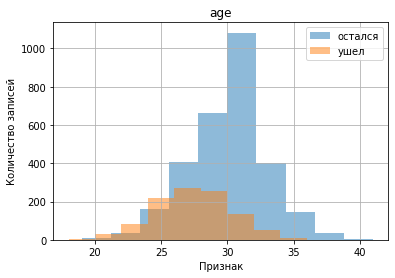

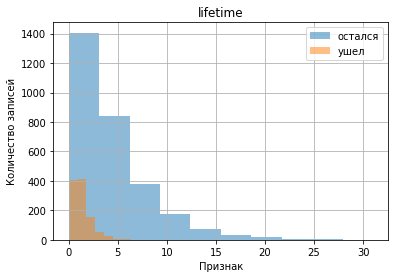

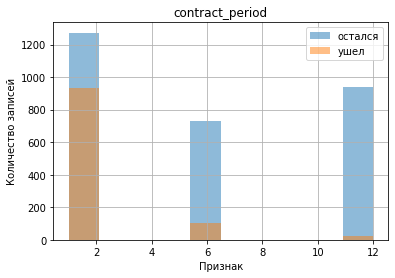

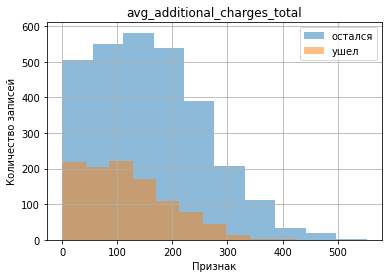

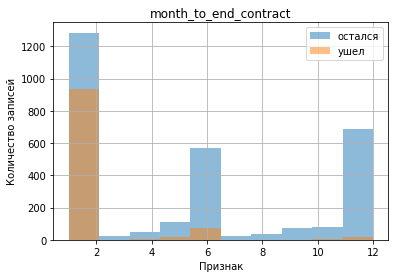

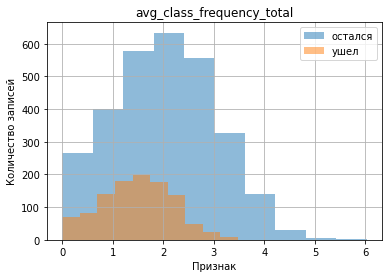

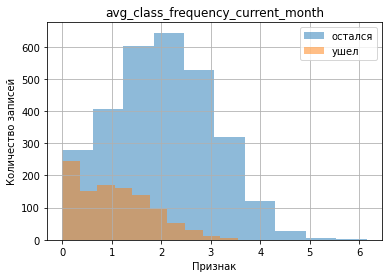

In [9]:
for i in list_1:
    df_1.groupby('churn')[i].hist(alpha=0.5)
    plt.legend(df_1['churn'].unique())
    plt.xlabel("Признак")
    plt.ylabel("Количество записей")
    plt.title(i)
    plt.show()

**Вывод:**

По гистограммам видно, что чаще уходят клиенты в возрасте от 20 до 26 лет, время с момента первого обращения которых в фитнес-центр составляет 1-2 месяца, с абонементом на 1 месяц. Суммарная выручка от других услуг фитнес-центра на долю ушедших относительно доли постоянных клиетов невелика.

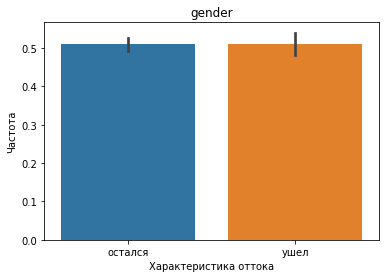

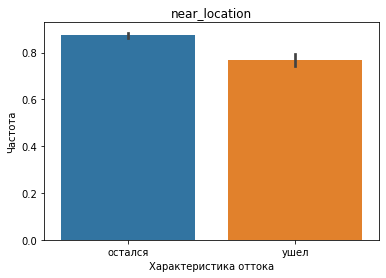

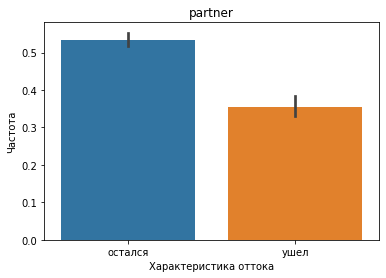

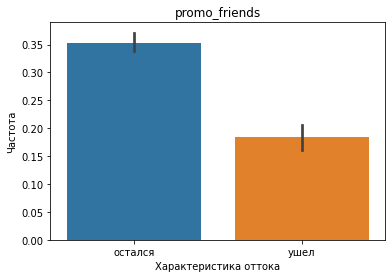

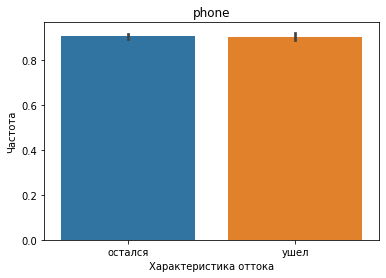

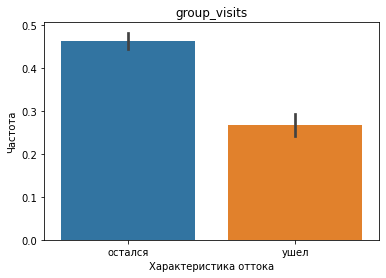

In [10]:
for i in list_2:
    sns.barplot(data=df_1, x='churn', y=i)
    plt.xlabel("Характеристика оттока")
    plt.ylabel("Частота")
    plt.title(i)
    plt.show()

**Вывод:**

На графиках видно, что чаще остаются клиенты, которые живут или работают неподалеку, приходящие по акции "приведи друга" и посещающие групповые занятия. Пол клиента на отток не влияеет.

#### Построим матрицу корреляций .

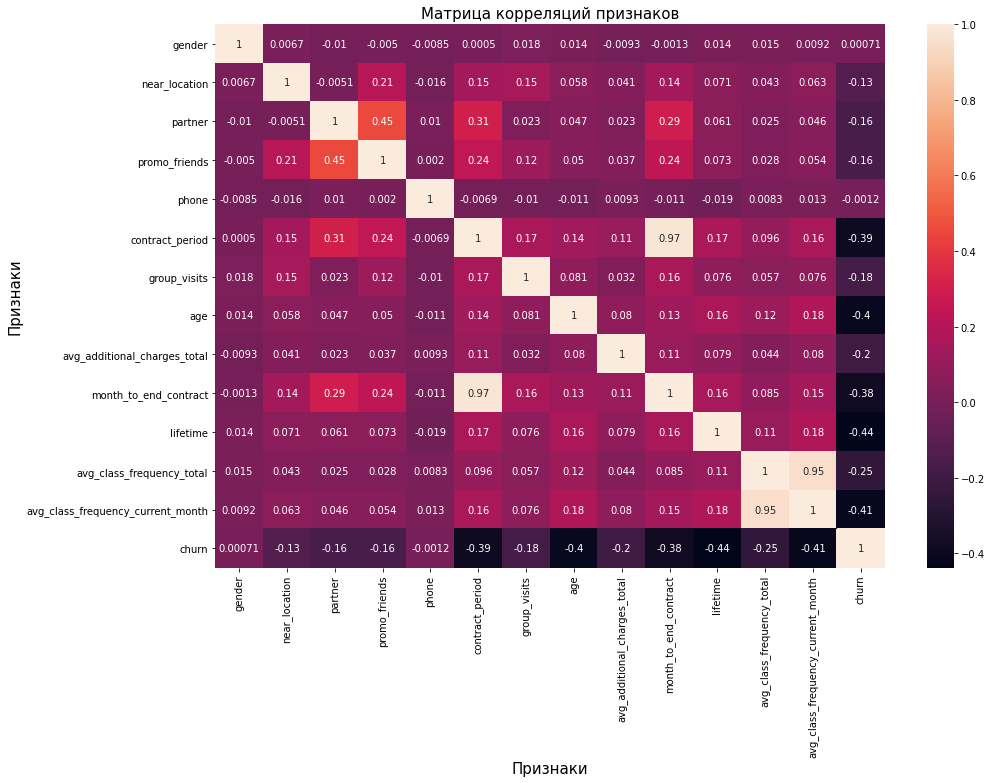

In [11]:
matr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций признаков', fontsize = 15)
plt.xlabel('Признаки', fontsize = 15)
plt.ylabel('Признаки', fontsize = 15)
plt.show()

**Вывод:**

Сильную корреляция у признаков, которую надо будет учесть в моделях линейной регрессии:
* 'contract_period' и 'month_to_end_contract'- чем больше период абонемента, тем скорее всего больше месяцев осталось;
* 'avg_class_frequency_current_month' и 'avg_class_frequency_total' - те кто давно ходит с постоянной регулярностью, тот и за последний месяц ходил скорее всего с таким же графиком.

Слабая кореляция у признаков: 'contract_period', 'age', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month'

Очень слабая и почти нулевая корреляция у признаков: 'near_location', 'partner', 'promo_friends', 'group_visits', 'avg_additional_charges_total', 'avg_class_frequency_total', 'gender' и 'phone'.

### Шаг 3. Построим модель прогнозирования оттока клиентов

#### Разбиение данных на обучающую и валидационную выборки

In [12]:
#Разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis=1)
y = df['churn'] 
#Разделяем модель на обучающую и валидационную выборки и применяем стандартизацию.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
display(X_train_st[:5])
#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986, -0.84769226,  0.57944798,  0.37161711,  1.59173796,
         1.12734972,  1.75580418,  1.61822807],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125,  0.31628211,
        -0.81299073, -0.84769226,  0.27046055, -1.09697378, -0.79568246,
         5.88138322, -0.2239674 , -0.01340886],
       [ 0.98511083,  0.4175068 ,  1.03175391, -0.67567125,  0.31628211,
         1.60502986, -0.84769226, -0.65650171, -1.18374157,  1.83048   ,
         0.3350108 , -0.84308456, -0.80541199],
       [-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         0.28610954, -0.84769226, -0.96548914, -0.95158829,  0.39802775,
         1.39146269,  0.66771379,  0.64605224],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125, -3.16173427,
        -0.81299073, -0.84769226, -0.03852687,  0.97190435, -0.79568246,
         0.07089783, -0.19587934, -0.16038147]])

#### Обучим модель на train-выборке двумя способами: логистической регрессией, случайным лесом.


In [13]:
#Логическая регрессия
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print('accuracy_score: {}\nprecision_score: {}\nrecal_score: {}'.format(
    accuracy_score(y_test, lr_predictions).round(2),
    precision_score(y_test, lr_predictions).round(2),
    recall_score(y_test, lr_predictions).round(2)
))

accuracy_score: 0.91
precision_score: 0.82
recal_score: 0.8


In [14]:
# Случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print('accuracy_score: {}\nprecision_score: {}\nrecal_score: {}'.format(
    accuracy_score(y_test, rf_predictions).round(2),
    precision_score(y_test, rf_predictions).round(2),
    recall_score(y_test, rf_predictions).round(2)
))

accuracy_score: 0.92
precision_score: 0.84
recal_score: 0.82


#### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

**Вывод:** 

Обе модели показали очень схожие результаты, модель "Случайный лес"  - немного лучше, а значит чуть точнее.

По параметру Accuracy_score "Случайный лес" совсем не много выигрывает у "Логистическая регрессия" (0,92 против 0,91), по precision_score тоже "Случайный лес" выше (0,84 проитив 0,82) и также немного лучше по recall_score (0,82 против 0,8)

По всем параметрам "Случайный лес" дает результат немного лучше чем "Логистическая регрессия"

### Шаг 4. Кластеризация клиентов

#### Матрица расстояний и дендрограмма

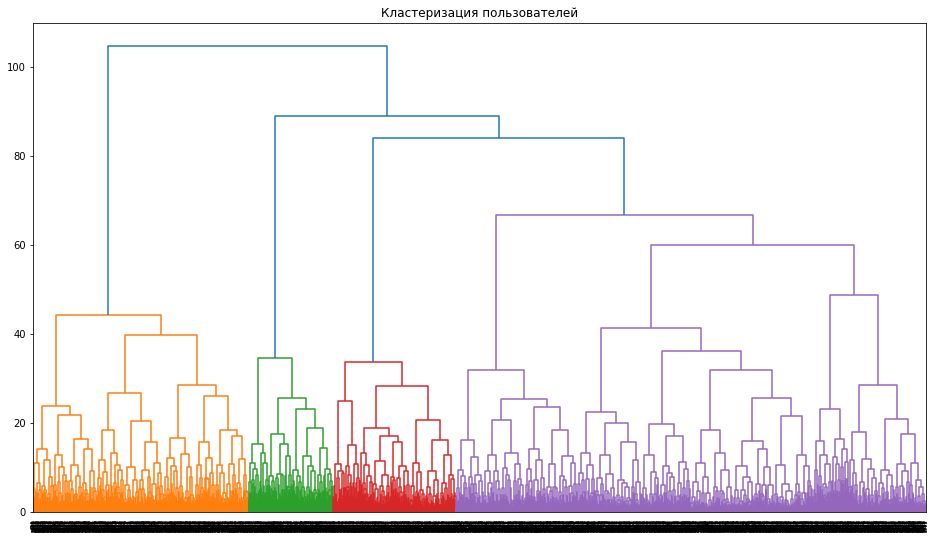

In [15]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')
# матрица расстояния
linked = linkage(df_sс, method = 'ward')
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

По дендрограмме явно прорисовывается 4 кластера, но по заданию нужно за число кластеров принять n=5, так и поступим.

#### Кластеризации по алгоритму K-Means и прогнозирование кластеров клиентов 

In [16]:
# зададим модель k_means с количеством кластеров 5
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(df_sс)
df['cluster'] = labels
# посчитаю долю оттока
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


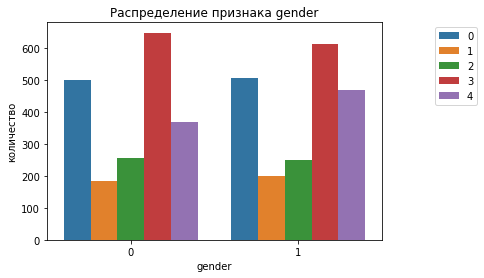

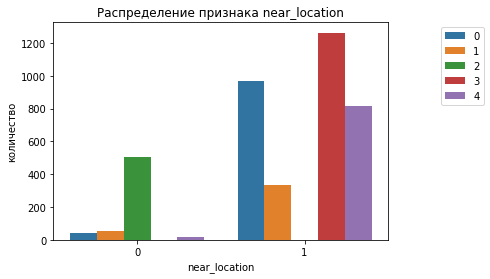

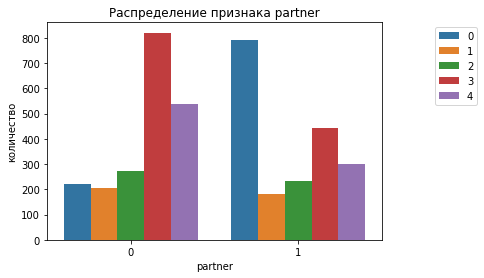

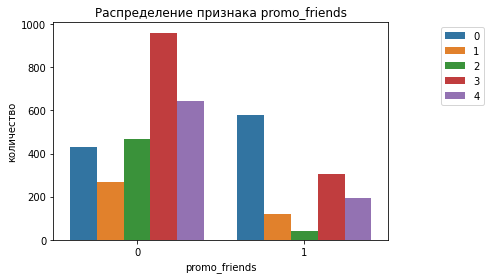

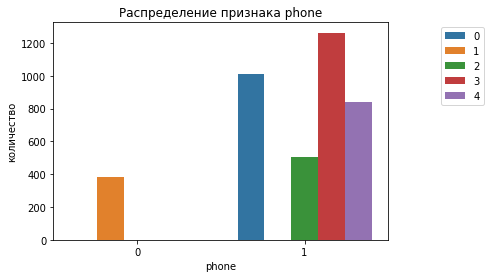

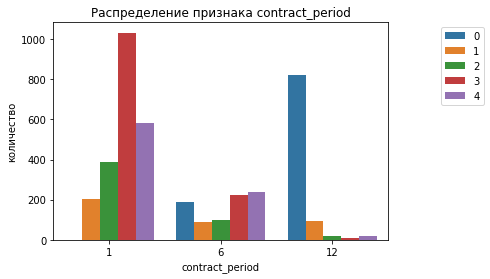

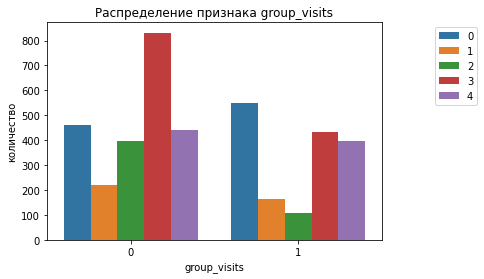

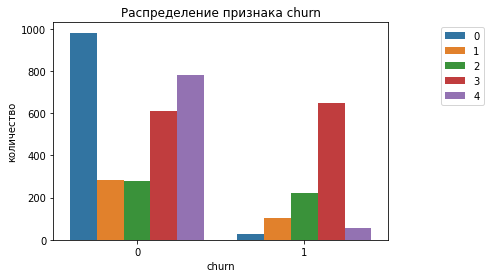

In [17]:
# Построим график для логических и дискретных переменных
log_discr_values = ['gender', 'near_location', 'partner', 
                    'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']
fig, ax = plt.subplots()
for column in log_discr_values:
    plt.title("Распределение признака "+column)
    sns.countplot(data=df, x=column, hue='cluster')
    plt.xlabel(column)
    plt.ylabel("количество")
    plt.legend(bbox_to_anchor=(1.3, 1))
    plt.show()


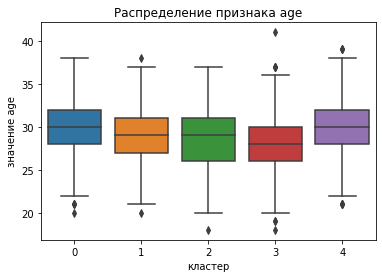

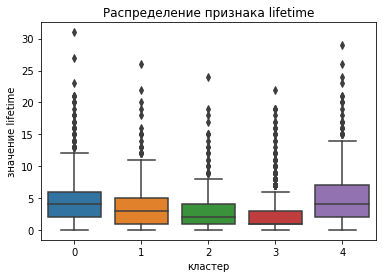

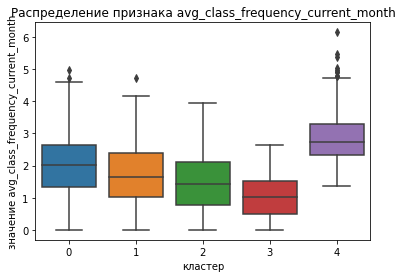

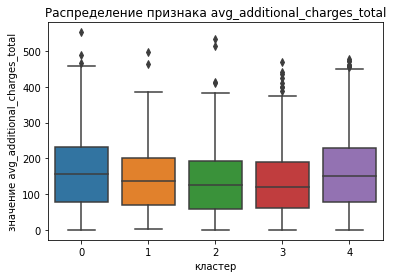

In [18]:
# Построим график для непрерывных переменных
cont_values = ['age', 'lifetime', 'avg_class_frequency_current_month', 
               'avg_additional_charges_total']
fig, ax = plt.subplots()
for column in cont_values:
    plt.title("Распределение признака "+column)
    sns.boxplot(x='cluster', y=column, data=df)
    plt.xlabel('кластер')
    plt.ylabel('значение '+column)
    plt.show()

In [19]:
# Для каждого полученного кластера посчитаем долю оттока¶
cluster_churn = df.groupby('cluster').agg({'churn': 'mean'})
cluster_churn.rename(columns= {'churn': 'доля оттока'}).style.format({'доля оттока': '{:,.2%}'.format})

,доля оттока
cluster,
0,2.77%
1,26.75%
2,44.36%
3,51.43%
4,6.80%


In [20]:
# Посмотрим сколько клиентов в кластерах
df.groupby(['cluster'])['gender'].count()

cluster
0    1010
1    385 
2    505 
3    1262
4    838 
Name: gender, dtype: int64

**Вывод:**

Кластер 0:

* Низкая доля оттока клиентов, всего 2.77%
* Количество людей 1010
* Возраст около от 28 до 33 лет
* Абонемент 12 мес
* Среднее посещение фитнес-клуба 2-3 раза в недлю
* Каждый второй посещает групповые занятия
* Большинство участники партнерской программы
* Проживают не далеко от фитнес клуба
* Время взаимодествия с фитнес клубом около 3 месяцев

Кластер 1:

* Средняя доля оттока клиентов, 26.75%
* Количество людей 385
* Возраст от 27 до 32 лет
* Абонемент 6 мес
* Среднее посещение фитнес-клуба 2-3 раза в недлю
* Каждый второй посещает групповые занятия
* Каждый второй участник партнерской программы
* Проживают в районе фитнес клуба
* Время взаимодествия с фитнес клубом около 4 месяцев

Кластер 2:

* Высокая доля оттока клиентов, 44.36% - это почти половина клиентов
* Количество людей 505
* Возраст от 27 до 34 лет
* Абонемент 2 мес
* Среднее посещение фитнес-клуба 2-4 раза в недлю
* Каждый 4 посещает груповые занятия
* Каждый второй участник партнерской программы
* Не проживают в районе фитнес клуба
* Время взаимодествия с фитнес клубом около 3 месяца

Кластер 3:

* Самая высокая доля оттока клиентов = 51.43% - больше половины клиентов ушло
* Количество людей 1262
* Возраст от 28 до 33 лет
* Абонемент 6 месяцев
* Среднее посещение фитнес-клуба до 2х раз в неделю
* Каждый 3 посещает груповые занятия
* Проживают в районе фитнес клуба
* Премя взаимодествия с фитнес клубом 2-3 месяца


Кластер 4:

* Низкая доля оттока клиентов = 6.80%
* Количество людей 838
* Возраст около от 18 до 28 лет
* Абонемент на 1 месяц
* Среднее посещение фитнес-клуба 1-2 раза в недлю
* Каждый 3 посещает груповые занятия
* Каждый второй участник партнерской программы
* Проживают в районе фитнес клуба
* Время взаимодествия с фитнес клубом 4-5 месяцев

### Общий вывод и рекомендации

**Общий вывод:**

В результате проведенного анадиза были сделаны следующие выводы: 

* Клиенты клуба - люди в возрасте от 18 лет до 41 года, средний возраст клиента - 29 лет.
* Клиенты, которые не ушёли, чаще всего являются сотрудниками компании-партнёра клуба, приходят в клуб по акции "приведи друга", имеют абонемент, в среднем, на 5-7 месяцев, посещают групповые занятия, приобретают другие услуги фитнес-центра, и посещают занятия, в среднем, 2 раза в неделю. Матрица корреляций показывает сильную связь между столбцами "средняя частота посещений в неделю за все время с начала действия абонемента" и "средняя частота посещений в неделю за предыдущий месяц", что говорит о стабильности посещений тренировок клиентами. Так же можно видеть связь между признаками "сотрудник организации-партнера" и участник акции "приведи друга".
* Чаще уходят молодые люди в возрасте от 20 до 26 лет, время с момента первого обращения которых в фитнес-центр составляет 1-2 месяца, с абонементом на 1 месяц.
* Чаще остаются клиенты, которые живут или работают не далеко от фитнес-клуба, приходящие по акции "приведи друга" и посещающие групповые занятия.
* От пола клиента отток не зависит.
* "Хорошими" кластерами оказались 0 и 4 кластер

Была построена модель прогнозирования оттока клиентов. Модель была обучена 2 методами: логистической регрессией и случайным лесом. В результате сравнения двух моделей было найдено, что они практически оденаковы, но случайный лес оказался чуть точнее.
Была сделана кластеризация клиентов. В результате анализа было выделено 5 кластеров клиентов:

0. В этой группе преимущественно люди в возрасте от 28 до 33 лет, имеют абонементы на 12 месяцев. Среднее количество посещений занятий за всё время действия и абонементов 1-3 раза в неделю.
1. В этой группе люди от 27 до 32 лет. Среднее количество посещений занятий за всё время действия и абонементов 2-3 раза в неделю.
2. В этой группе люди от 27 до 34 лет. Среднее количество посещений занятий за всё время действия и абонементов 2-4 раза в неделю. Люди из этой группы не оставляли номера телефонов. Люди, принадлежащие к этой группе часто покидают клуб.
3. В эой группе от 28 до 33 лет, имеющие абонементы на 6 месяцев. Среднее количество посещений занятий за всё время действия и абонементов до 2 раз в неделю. Клиенты живут или работают не далеко от фитнес-клуба, чаще пользуются акцией "приведи друга" и являются сотрудниками компаний-партнеров клуба, групповые тренировки посещают чаще.
4. В эту группу входят люди от 18 до 28 лет, имеющие абонементы на 1 месяц. Среднее количество посещений занятий за всё время действия и абонементов 1-2 раза в неделю. Они наиболее далеко живут или работают от клуба, реже остальных приходят по акции или работают в компании-партнере, реже остальных посещают групповые тренировки.

**Рекомендации**

В результате проведенного анализа была выявлена закономерность между фактом работы в компании-партнере и участием в акции "приведи друга". По этому нужно больше привлекать клиентов предлагая партнерские программы и промо-акции. Предлагать более выгодные цены на абонементы за 12 месяцев. Предлагать участвовать в групповых занятиях. Люди, посещающие групповые тренировки чаще становятся постоянными клиентами, можно предположить, что разнообразие групповых тренировок может привлечь больше клиентов.

Целевая аудитория:
Клиенты которые живут не далеко от фитнес-клуба, люди, которым около 30 лет.